In [1]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [2]:
df_copy = df.copy()

In [3]:
# Data set information like type of features and count of Non-Null information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In this datset there are no null values

Here we have some object features, we have to coonvert them to numerical form

In [4]:
obj_cols = df.select_dtypes(include=['object'])
obj_cols.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [5]:
# Finding unique values for each categorical feature
for i in obj_cols.columns:
    print(i +' feature has ' + str(df[i].nunique()) + ' unique values')

sex feature has 2 unique values
smoker feature has 2 unique values
region feature has 4 unique values


<AxesSubplot:>

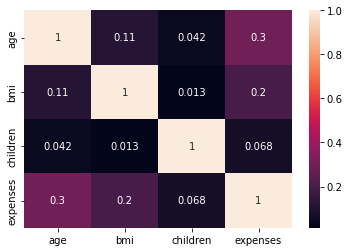

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

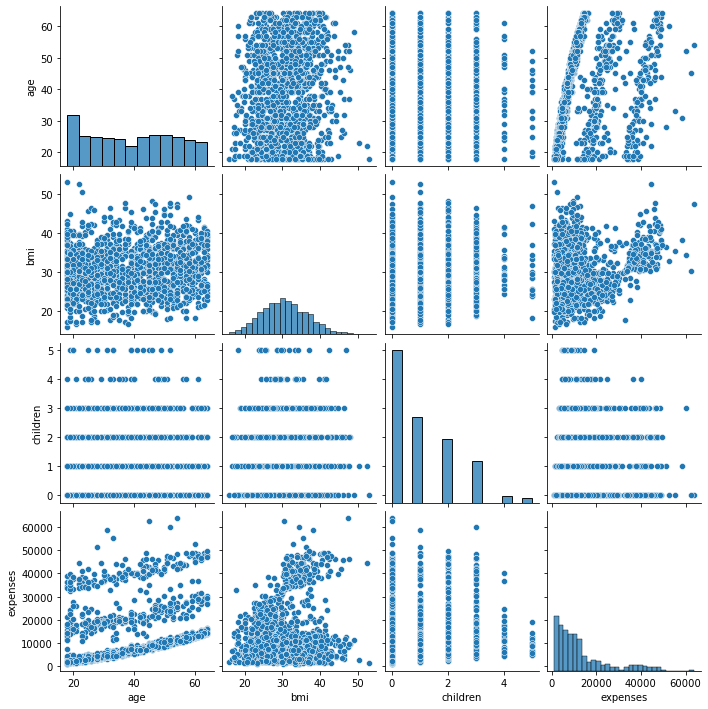

In [7]:
sns.pairplot(df)

In [8]:
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

In [11]:
# We can use get_dummies() of pandas to convert to numerical form
dummy_region = pd.get_dummies(df['region'])   
# here drop_first = True will remove first sub-feature from each feature, because we can derive deleted sub-feature from other sub-features
dummy_region.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [13]:
df = pd.concat([df,dummy_region],axis=1)

In [15]:
df.drop(columns='region',axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0


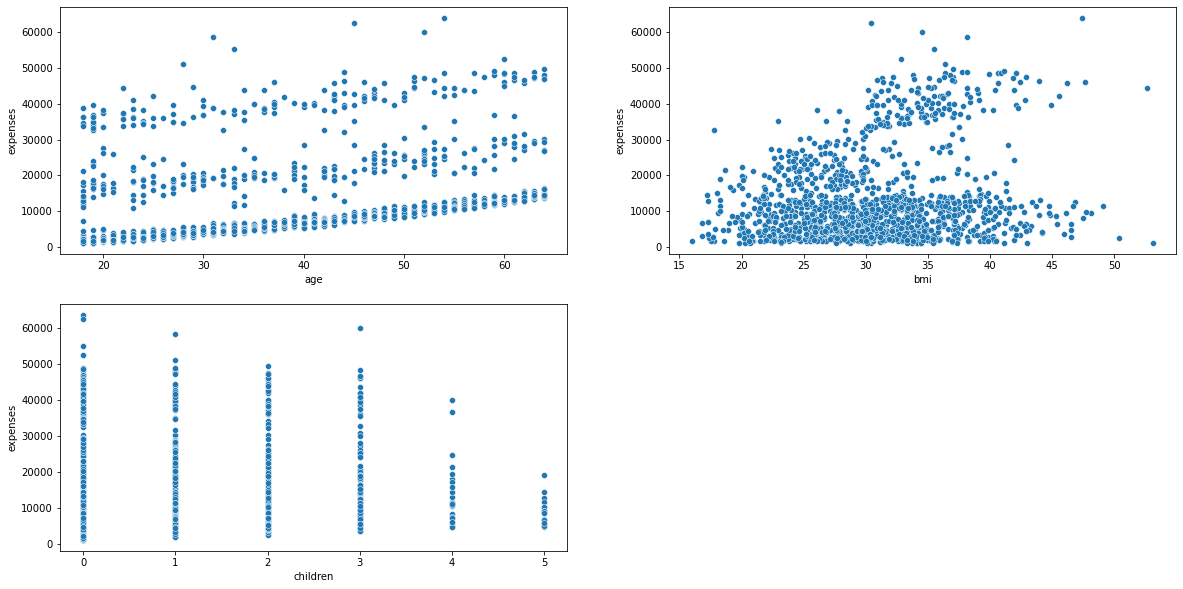

In [16]:
# Visualizing features

plt.figure(figsize=(20,10))
for i,feat in enumerate(['age','bmi','children']):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[feat],y=df.expenses)
plt.show()

Findings :- 

1. Older people has to pay more premium than younger ones

2. Higher BMI persons has to pay more than lower ones

3. Having high number of childern means can only spend less expenses on insurance

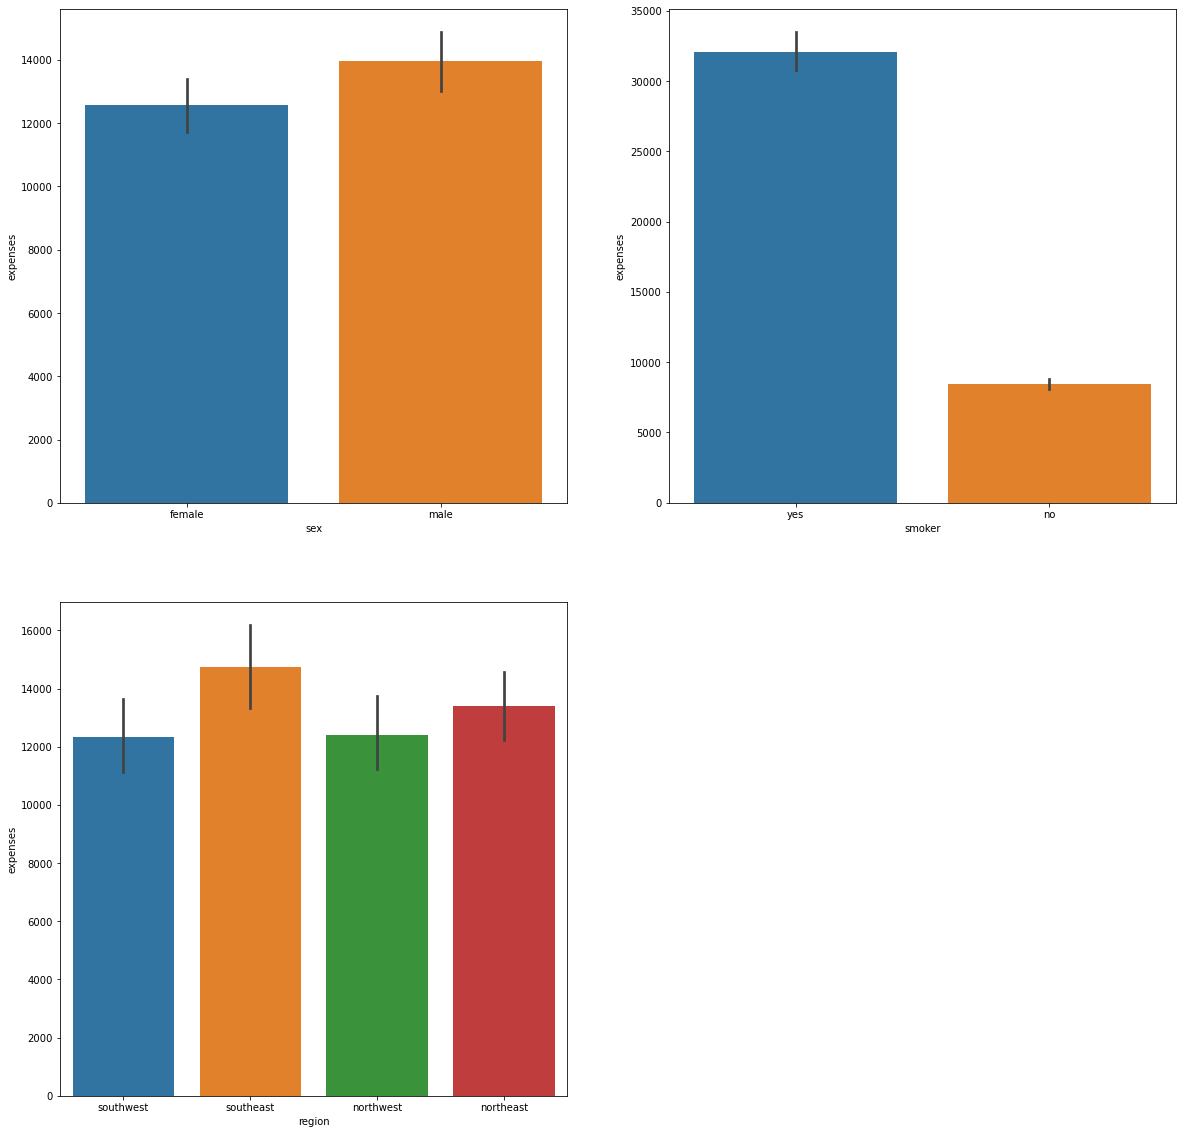

In [17]:
plt.figure(figsize=(20,20))
for i,feat in enumerate(['sex','smoker','region']):
    plt.subplot(2,2,i+1)
    sns.barplot(x=df_copy[feat],y=df_copy.expenses)
plt.show()

Observations: - 

1. expenses doesnot varies much with respect to 'sex' feature

2. Smoker has to pay more than Non-Smoker

3. expenses doesnot varies much with respect to 'region' feature

In [18]:
# Arranging dependent and independent variables for Modeling
x = df.drop('expenses',axis=1)
Y = df.expenses

In [19]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split

xtrain,xtest,Ytrain,Ytest = train_test_split(x,Y,test_size=1/4,random_state=1)

Here we have to find continous value, so we will buld regression models

In [20]:
from sklearn.metrics import r2_score,mean_squared_error

#Linear Regression

from sklearn.linear_model import LinearRegression

le = LinearRegression()
le_model = le.fit(xtrain,Ytrain)
# predicting values for test data
le_Ypredict = le_model.predict(xtest)
print('MSE of Linear Regression : ' + str(round(mean_squared_error(Ytest,le_Ypredict),2)))
print('r2 score of Linear Regression : ' + str(round(r2_score(Ytest,le_Ypredict),2)))

MSE of Linear Regression : 35792825.88
r2 score of Linear Regression : 0.73


In [21]:
#DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt_model = dt.fit(xtrain,Ytrain)
# predicting values for test data
dt_Ypredict = dt_model.predict(xtest)
print('MSE of DecisionTreeRegressor : ' + str(round(mean_squared_error(Ytest,dt_Ypredict),2)))
print('r2 score of DecisionTreeRegressor : ' + str(round(r2_score(Ytest,dt_Ypredict),2)))

MSE of DecisionTreeRegressor : 48385944.4
r2 score of DecisionTreeRegressor : 0.64


In [22]:
# Ensemble Technices

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(xtrain,Ytrain)
# predicting values for test data
rf_Ypredict = rf_model.predict(xtest)
print('MSE of RandomForestRegressor : ' + str(round(mean_squared_error(Ytest,rf_Ypredict),2)))
print('r2 score of RandomForestRegressor : ' + str(round(r2_score(Ytest,rf_Ypredict),2)))
 

MSE of RandomForestRegressor : 22831386.03
r2 score of RandomForestRegressor : 0.83


In [24]:
#for saving the model ---
import pickle
pickle_dum = open('insurancemodel.pkl','wb')
pickle.dump(rf_model,pickle_dum)
pickle_dum.close()

In [25]:
rf_model.predict(x[:1])

array([17344.1272])

In [26]:
x[:1]

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,0,1
